# Ryotaro Shiba's books analysis (Rakuten API)

**Contents**
1. Number of publishers
2. Price of the books
3. Review 
4. Popular Books
5. Word cloud

In [2]:
# Import dependancies
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Import data

In [3]:
df = pd.read_csv("Resources/ryotaro_books.csv")
df.head()

,author,authorKana,booksGenreId,itemCaption,itemPrice,publisherName,reviewAverage,reviewCount,salesDate,seriesName,seriesNameKana,size,subTitle,subTitleKana,title
0,司馬 遼太郎,シバ リョウタロウ,001004008003/001019001,すさまじい進撃を続けた織田信長は上洛を遂げ、将軍に足利義昭を擁立して、天下布武の理想を実行に...,1100,新潮社,4.30,123,2004年02月,新潮文庫 新潮文庫,シンチョウブンコ シンチョウブンコ,文庫,織田信長 後,オダノブナガ ゴ,国盗り物語 4
1,司馬 遼太郎,シバ リョウタロウ,001004008003/001019001,元治元年六月の池田屋事件以来、京都に血の雨が降るところ、必ず土方歳三の振るう大業物和泉守兼定...,935,新潮社,4.44,535,2007年01月,新潮文庫 しー9-9 新潮文庫,シンチョウブンコ シンチョウブンコ,文庫,NaN,NaN,燃えよ剣 下
2,司馬 遼太郎,シバ リョウタロウ,001004008003/001019001,幕末の動乱期を新選組副長として剣に生き剣に死んだ男、土方歳三の華麗なまでに頑な生涯を描く。武...,935,新潮社,4.30,774,2007年01月,新潮文庫 しー9-8 新潮文庫,シンチョウブンコ シンチョウブンコ,文庫,NaN,NaN,燃えよ剣 上
3,司馬 遼太郎,シバ リョウタロウ,001004008003/001019001,世は戦国の初頭。松波庄九郎は妙覚寺で「智恵第一の法蓮房」と呼ばれたが、発心して還俗した。京の...,880,新潮社,4.29,184,2004年01月,新潮文庫 新潮文庫,シンチョウブンコ シンチョウブンコ,文庫,斎藤道三 前,サイトウドウサン ゼン,国盗り物語 1
4,司馬 遼太郎,シバ リョウタロウ,001004008003/001019001,美濃を征服した斉藤道三は義理の子義竜の反乱に倒れたが、自らの天下統一の夢を女婿織田信長に託し...,880,新潮社,4.20,116,2004年02月,新潮文庫 新潮文庫,シンチョウブンコ シンチョウブンコ,文庫,織田信長 前,オダノブナガ ゼン,国盗り物語 3


In [3]:
df.describe()

,itemPrice,reviewAverage,reviewCount
count,270.000000,270.000000,270.000000
mean,1536.274074,3.524185,50.122222
std,1355.468258,1.435023,96.481848
min,523.000000,0.000000,0.000000
25%,748.000000,3.670000,2.000000
50%,858.000000,4.000000,13.000000
75%,1842.500000,4.297500,57.000000
max,12980.000000,5.000000,774.000000


In [4]:
df.columns

Index(['author', 'authorKana', 'booksGenreId', 'itemCaption', 'itemPrice',
       'publisherName', 'reviewAverage', 'reviewCount', 'salesDate',
       'seriesName', 'seriesNameKana', 'size', 'subTitle', 'subTitleKana',
       'title'],
      dtype='object')

### Publishers

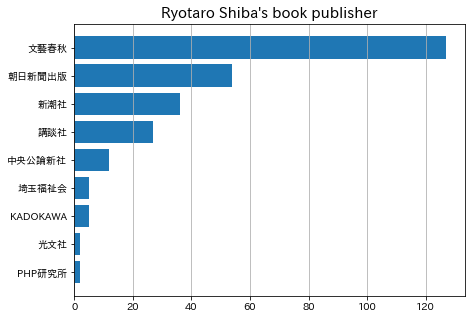

In [5]:
publish_name  = pd.DataFrame(df.publisherName.value_counts())

plt.figure(figsize=(7,5))
plt.barh(publish_name.index, publish_name['publisherName'])
plt.title("Ryotaro Shiba's book publisher", fontsize=15)
plt.gca().invert_yaxis()
plt.grid(axis='x')

Top 3 publishers
1. Bungeisyunsyu
2. Asahi newspaper
3. Shincho-sha

### Book Size

In [6]:
books_type = pd.DataFrame(df['size'].value_counts())

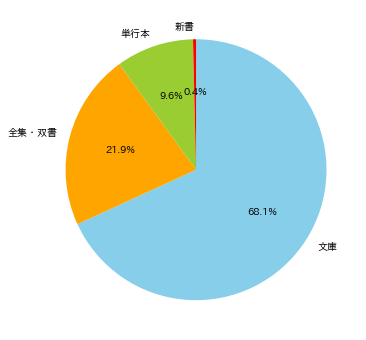

,size
文庫,184
全集・双書,59
単行本,26
新書,1


In [7]:
colors = ['skyblue','orange','yellowgreen','red']
plt.figure(figsize=(6,6))
plt.pie(books_type['size'], labels=books_type.index, startangle=90, autopct="%1.1f%%", counterclock=False,colors=colors)
plt.show()
books_type

### Boxplot of prices

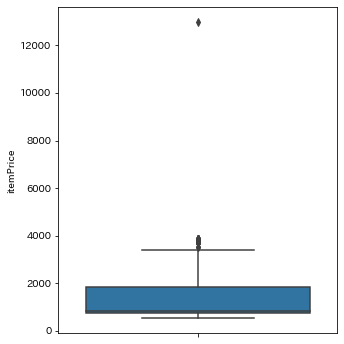

In [8]:
# A boxplot of the item prices
plt.figure(figsize=(5,6))
sns.boxplot(y=df.itemPrice)
plt.show()

There is one extreme outlier which is more than 12,000 yen on the chart above. Found out that the item is actuary a set of 8 books.
I am going to remove this for temporary so that we can see an more acurate boxplot.

In [9]:
# removed an outlier (temporary data)
temp_df = df[df['itemPrice']<10000]

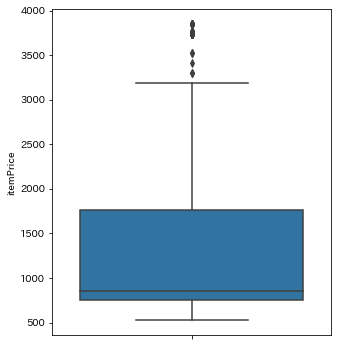

In [10]:
plt.figure(figsize=(5,6))
sns.boxplot(y= temp_df.itemPrice)
plt.show()

Now we can see that the majority of his books are between 700 yen and 1700 yen.
Although there are still outliers on the chart, those are sets of multiple books.

### Distribution of review average

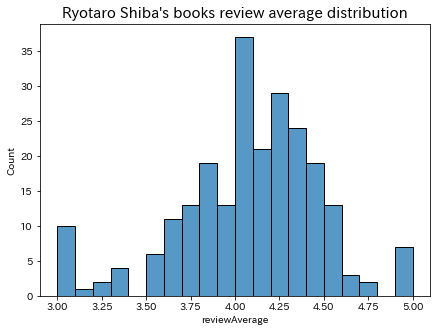

In [11]:
plt.figure(figsize=(7,5))
sns.histplot(df[df.reviewAverage > 0]['reviewAverage'], bins=20)
plt.title("Ryotaro Shiba's books review average distribution", fontsize=15)
plt.show()

Most of the reviews are between 4.0 and 4.25 which is pretty high.

### Ryotaro Shiba's Books ranking

In [12]:
books_ranking = df[['title', 'reviewAverage','reviewCount']][:10].sort_values(by=['reviewAverage','reviewCount'], ascending=False)
books_ranking

,title,reviewAverage,reviewCount
9,竜馬がゆく 八,4.65,258
8,竜馬がゆく 七,4.50,181
1,燃えよ剣 下,4.44,535
5,国盗り物語 2,4.40,100
2,燃えよ剣 上,4.30,774
0,国盗り物語 4,4.30,123
3,国盗り物語 1,4.29,184
6,項羽と劉邦 上,4.24,160
4,国盗り物語 3,4.20,116
7,義経 上,3.88,87


It is very clear that "竜馬がゆく", "燃えよ剣", and "国盗り物語" are popular series.

### Correlation

In [4]:
# Filter the dataset by itemprice less than 1000 yen.
temp_df2 = df[df['itemPrice'] < 1000]

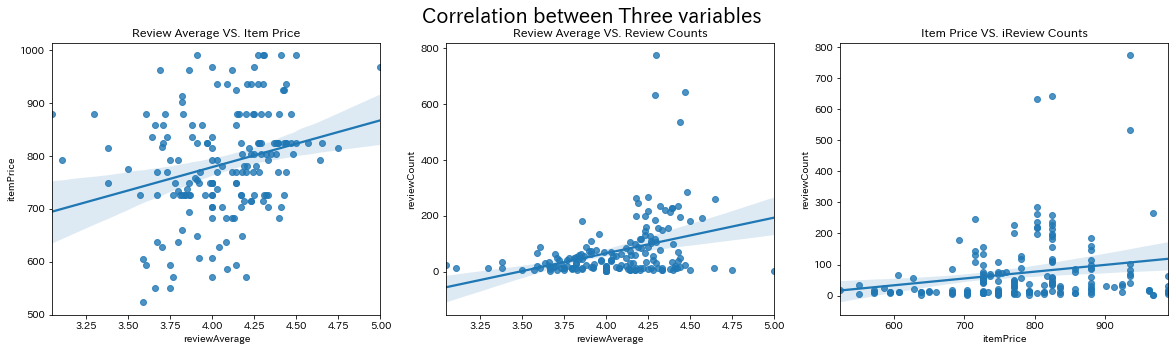

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5))
sns.regplot(x=temp_df2['reviewAverage'],y=temp_df2['itemPrice'],ax=ax1).set_title("Review Average VS. Item Price")
sns.regplot(x=temp_df2['reviewAverage'],y=temp_df2['reviewCount'], ax=ax2).set_title("Review Average VS. Review Counts")
sns.regplot(x=temp_df2['itemPrice'],y=temp_df2['reviewCount'], ax=ax3).set_title("Item Price VS. iReview Counts")
fig.suptitle("Correlation between Three variables", fontsize=20)
plt.show()

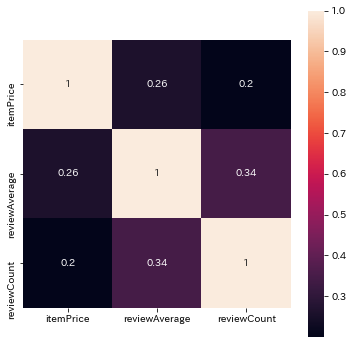

In [38]:
plt.figure(figsize=(6,6))
sns.heatmap(temp_df2.corr(),annot=True, square=True)
plt.show()

### Word Cloud

In [13]:
df.itemCaption = df.itemCaption.fillna("")

In [14]:
list = []
for text in df.itemCaption:
    list.append(text[:50])

In [15]:
df['short_caption'] = list

In [16]:
text = ",".join(df.short_caption)
stop_words = ['は','これ','と','が','を','そして','しかし','と','では','ほかに','から','だが','など','一方']

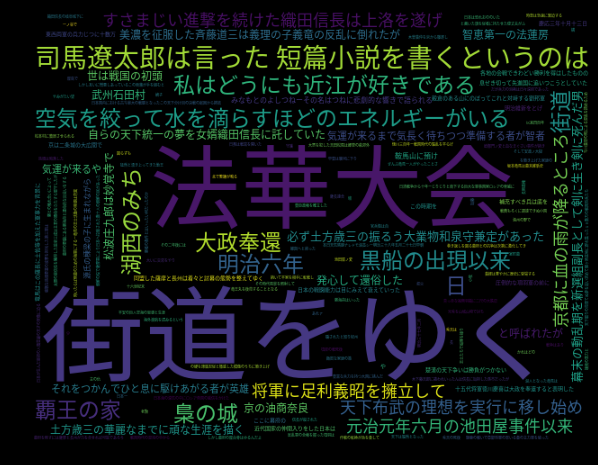

In [17]:
wc = WordCloud(font_path="./NotoSansJP-Regular.otf", stopwords=stop_words,width=620,height=480)
wc.generate(text)
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(wc)
plt.show()
